In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
nfl= pd.read_csv("NFL Players data.csv", decimal=",")

In [3]:
print(nfl.head())

   nflId  season  teamId   displayName firstName middleName lastName suffix  \
0    182    2008    2120  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
1    182    2009    2120  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
2    182    2010    2120  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
3    182    2011    3000  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
4    182    2012    2100  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   

  status positionGroup  ...      gsisId        homeTown collegeId  \
0    ACT            LB  ...  00-0026258  Stillwater, OK      5859   
1    ACT            LB  ...  00-0026258  Stillwater, OK      5859   
2    ACT            LB  ...  00-0026258  Stillwater, OK      5859   
3    ACT            LB  ...  00-0026258  Stillwater, OK      5859   
4    ACT            LB  ...  00-0026258  Stillwater, OK      5859   

     collegeName  height weight  \
0  Virginia Tech   2-Jun  232.0   
1  Virginia Tech   2-Jun  242.0   
2  Vi

In [4]:
print(nfl.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56175 entries, 0 to 56174
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nflId          56175 non-null  int64  
 1   season         56175 non-null  int64  
 2   teamId         56175 non-null  int64  
 3   displayName    56175 non-null  object 
 4   firstName      56175 non-null  object 
 5   middleName     43810 non-null  object 
 6   lastName       56175 non-null  object 
 7   suffix         5642 non-null   object 
 8   status         41710 non-null  object 
 9   positionGroup  56175 non-null  object 
 10  position       56175 non-null  object 
 11  esbId          56175 non-null  object 
 12  gsisId         55514 non-null  object 
 13  homeTown       50502 non-null  object 
 14  collegeId      56175 non-null  int64  
 15  collegeName    56175 non-null  object 
 16  height         56166 non-null  object 
 17  weight         56166 non-null  float64
 18  headsh

In [5]:
unique_heights = nfl['height'].unique()
print("Different heights listed in the 'Height' column:")
for height in unique_heights:
    print(height)

Different heights listed in the 'Height' column:
2-Jun
11-May
5-Jun
1-Jun
3-Jun
4-Jun
Jun-00
7-Jun
9-May
8-Jun
6-Jun
10-May
8-May
7-May
5-May
9-Jun
6-May
nan
10-Jun


In [6]:
data = {'height': ['2-Jun', '11-May', '5-Jun', '1-Jun', '3-Jun', '4-Jun', 'Jun-00', '7-Jun', '9-May', '8-Jun', '6-Jun', '10-May', '8-May', '7-May', '5-May', '9-Jun', np.nan, '10-Jun']}
nfl1 = pd.DataFrame(nfl)

date_to_height = {
    '2-Jun': "6'2",
    '11-May': "5'11",
    '5-Jun': "6'5",
    '1-Jun': "6'1",
    '3-Jun': "6'3",
    '4-Jun': "6'4",
    'Jun-00': "6'0", 
    '7-Jun': "6'7",
    '9-May': "5'9",
    '8-Jun': "6'8",
    '6-Jun': "6'6",
    '10-May': "5'10",
    '8-May': "5'8",
    '7-May': "5'7",
    '5-May': "5'5",
    '9-Jun': "6'9",
    '6-May': "5'6",
    'nan': np.nan,  
    '10-Jun': "6'10"
}


nfl1['Height'] = nfl['height'].map(date_to_height)


print(nfl1[['height', 'Height']])


      height Height
0      2-Jun    6'2
1      2-Jun    6'2
2      2-Jun    6'2
3      2-Jun    6'2
4      2-Jun    6'2
...      ...    ...
56170  2-Jun    6'2
56171  4-Jun    6'4
56172  9-May    5'9
56173  3-Jun    6'3
56174  2-Jun    6'2

[56175 rows x 2 columns]


In [7]:
print(nfl1.head())

   nflId  season  teamId   displayName firstName middleName lastName suffix  \
0    182    2008    2120  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
1    182    2009    2120  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
2    182    2010    2120  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
3    182    2011    3000  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   
4    182    2012    2100  Xavier Adibi    Xavier    Oyekola    Adibi    NaN   

  status positionGroup  ...        homeTown collegeId    collegeName height  \
0    ACT            LB  ...  Stillwater, OK      5859  Virginia Tech  2-Jun   
1    ACT            LB  ...  Stillwater, OK      5859  Virginia Tech  2-Jun   
2    ACT            LB  ...  Stillwater, OK      5859  Virginia Tech  2-Jun   
3    ACT            LB  ...  Stillwater, OK      5859  Virginia Tech  2-Jun   
4    ACT            LB  ...  Stillwater, OK      5859  Virginia Tech  2-Jun   

   weight                                       he

In [8]:
unique_heights = nfl1['Height'].unique()
print("Different heights listed in the 'Height' column:")
for Height in unique_heights:
    print(Height)

Different heights listed in the 'Height' column:
6'2
5'11
6'5
6'1
6'3
6'4
6'0
6'7
5'9
6'8
6'6
5'10
5'8
5'7
5'5
6'9
5'6
nan
6'10


In [9]:
data = {'Height': ['6\'2', '5\'11', '6\'5', '6\'1', '6\'3', '6\'4', '6\'0', '6\'7', '5\'9',
                   '6\'8', '6\'6', '5\'10', '5\'8', '5\'7', '5\'5', '6\'9', '5\'6', np.nan, '6\'10']}
nfl2 = pd.DataFrame(nfl1)

# Function to convert height to inches
def convert_to_inches(height):
    if pd.isna(height):
        return np.nan

    feet, inches = map(int, height.split('\''))
    total_inches = feet * 12 + inches
    return total_inches

# Create a new column 'Height_Inches'
nfl2['Height_Inches'] = nfl1['Height'].apply(convert_to_inches)
print(nfl2)

         nflId  season  teamId     displayName firstName middleName lastName  \
0          182    2008    2120    Xavier Adibi    Xavier    Oyekola    Adibi   
1          182    2009    2120    Xavier Adibi    Xavier    Oyekola    Adibi   
2          182    2010    2120    Xavier Adibi    Xavier    Oyekola    Adibi   
3          182    2011    3000    Xavier Adibi    Xavier    Oyekola    Adibi   
4          182    2012    2100    Xavier Adibi    Xavier    Oyekola    Adibi   
...        ...     ...     ...             ...       ...        ...      ...   
56170  2563377    2019    2100    Quart'e Sapp   Quart'e    Patrick     Sapp   
56171  2563379    2019    3300  Fisayo Awolaja    Fisayo        NaN  Awolaja   
56172  2563382    2019    4500  Jordan Holland    Jordan     Rashad  Holland   
56173  2563383    2019    4600      Logan Tago     Logan        NaN     Tago   
56174  2563433    2019     200   Tavonn Salter    Tavonn        NaN   Salter   

      suffix status positionGroup  ... 

In [10]:
unique_heights = nfl2['Height'].unique()
print("Unique heights in the 'Height' column:")
print(unique_heights)

# Print unique values in the 'Height_Inches' column
unique_heights_inches = nfl2['Height_Inches'].unique()
print("\nUnique heights in the 'Height_Inches' column:")
print(unique_heights_inches)

Unique heights in the 'Height' column:
["6'2" "5'11" "6'5" "6'1" "6'3" "6'4" "6'0" "6'7" "5'9" "6'8" "6'6" "5'10"
 "5'8" "5'7" "5'5" "6'9" "5'6" nan "6'10"]

Unique heights in the 'Height_Inches' column:
[74. 71. 77. 73. 75. 76. 72. 79. 69. 80. 78. 70. 68. 67. 65. 81. 66. nan
 82.]


In [11]:
agg_functions = {
    'Height_Inches': 'first',
    'weight': 'first',
    'homeTown': 'first',
    'birthDate': 'first',
    'collegeName': 'first',
    'collegeId': 'first',
    'position': 'first',
    'displayName': 'first',
    'season': 'first'
}
the_nfl = nfl2.groupby('nflId').agg(agg_functions).reset_index()

# Print the combined DataFrame
print(the_nfl)

         nflId  Height_Inches  weight           homeTown   birthDate  \
0          182           74.0   232.0     Stillwater, OK  10/18/1984   
1          184           71.0   184.0        Houston, TX   6/12/1984   
2          188           77.0   315.0        Ahoskie, NC  10/15/1986   
3          190           73.0   250.0         Tustin, CA   5/26/1986   
4          196           75.0   212.0   Laguna Beach, CA   8/16/1983   
...        ...            ...     ...                ...         ...   
15348  2563377           74.0   223.0               None    3/8/1997   
15349  2563379           76.0   300.0               None   8/20/1996   
15350  2563382           69.0   195.0  Missouri City, TX   3/15/1995   
15351  2563383           75.0   250.0               None        None   
15352  2563433           74.0   194.0               None    3/1/1996   

                  collegeName  collegeId position     displayName  season  
0               Virginia Tech       5859      OLB    Xavier

In [12]:
missing_values = the_nfl.isnull().sum()
total_missing = the_nfl.isnull().sum().sum()
print("Dimensions", the_nfl.shape)
print("Missing Values", missing_values)
print("Total Missing", total_missing)

Dimensions (15353, 10)
Missing Values nflId               0
Height_Inches       7
weight              7
homeTown         3860
birthDate          99
collegeName         0
collegeId           0
position            0
displayName         0
season              0
dtype: int64
Total Missing 3973


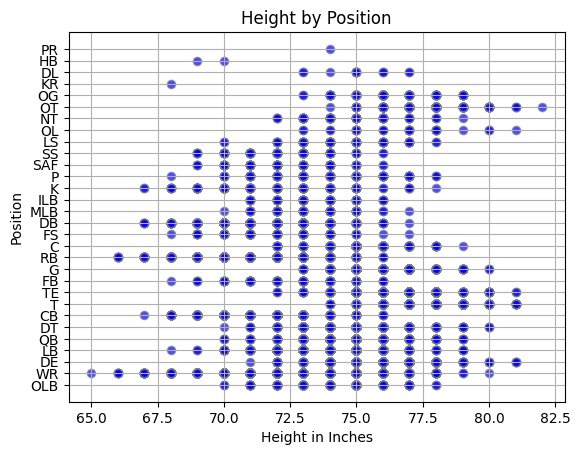

In [13]:
plt.scatter(the_nfl['Height_Inches'], the_nfl['position'], c='blue', alpha=0.7, edgecolors='grey')
plt.xlabel('Height in Inches')
plt.ylabel('Position')
plt.title('Height by Position')
plt.grid(True)
plt.show()

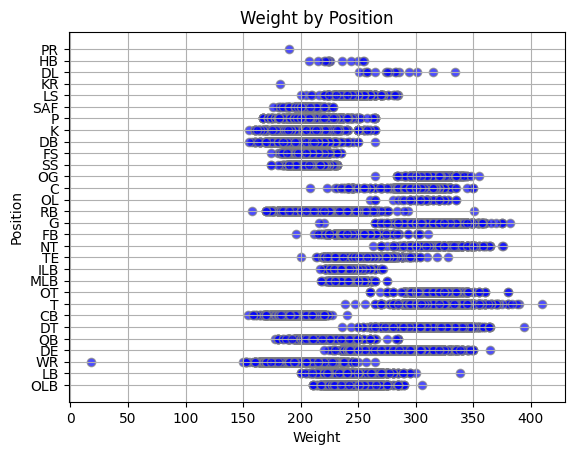

In [14]:
plt.scatter(nfl2['weight'], nfl2['position'], c='blue', alpha=0.7, edgecolors='grey')
plt.xlabel('Weight')
plt.ylabel('Position')
plt.title('Weight by Position')
plt.grid(True)
plt.show()

In [15]:
player_season_counts = nfl2.groupby(['nflId', 'displayName'])['season'].nunique()

# Identify the player(s) with the maximum number of seasons played
max_seasons_players = player_season_counts[player_season_counts == player_season_counts.max()]

# Print the result
print("Player(s) with the most seasons:")
print(max_seasons_players.reset_index())

Player(s) with the most seasons:
     nflId     displayName  season
0  2503471  Adam Vinatieri      21


In [16]:
home_town_counts = the_nfl['homeTown'].value_counts()
# Display the most common homeTown
most_common_home_town = home_town_counts.idxmax()
count_most_common_home_town = home_town_counts.max()
print(f"The most common homeTown is '{most_common_home_town}' with {count_most_common_home_town} occurrences.")

The most common homeTown is 'Los Angeles, CA' with 226 occurrences.


In [17]:
most_common_college = the_nfl['collegeName'].value_counts().idxmax()
print("Most common College is ", most_common_college)

Most common College is  Miami (Fla.)


In [18]:
most_common_height = nfl2['Height'].value_counts().idxmax()
print("The most common height is:", most_common_height)

The most common height is: 6'3


In [19]:
weight_counts = the_nfl['weight'].value_counts()

most_common_weight = weight_counts.idxmax()
most_common_weight_count = weight_counts.max()

print(f"The most common weight among NFL players is {most_common_weight} pounds with {most_common_weight_count} occurrences.")

The most common weight among NFL players is 190.0 pounds with 405 occurrences.


In [20]:
most_common_college_per_season = nfl2.groupby('season')['collegeName'].apply(lambda x: x.mode().iloc[0])

# Print the result
print("Most common college for each season:")
print(most_common_college_per_season)

Most common college for each season:
season
1999    Florida State
2000    Florida State
2001    Florida State
2002       Notre Dame
2003       Notre Dame
2004     Miami (Fla.)
2005     Miami (Fla.)
2006     Miami (Fla.)
2007     Miami (Fla.)
2008     Miami (Fla.)
2009     Miami (Fla.)
2010              LSU
2011              USC
2012     Miami (Fla.)
2013              LSU
2014     Miami (Fla.)
2015     Miami (Fla.)
2016          Alabama
2017              LSU
2018              LSU
2019          Alabama
Name: collegeName, dtype: object


In [21]:
most_common_position_per_college = the_nfl.groupby(['collegeName', 'position']).size().reset_index(name='Counts')
most_common_position_per_college = most_common_position_per_college.sort_values(by=['collegeName', 'Counts'], ascending=[True, False])
most_common_position_per_college = most_common_position_per_college.drop_duplicates('collegeName')


print("Most common position for each college:")
print(most_common_position_per_college[['collegeName', 'position']])

Most common position for each college:
            collegeName position
7     Abilene Christian       WR
8           Adams State       DB
11            Air Force       DT
31                Akron       WR
35              Alabama       DE
...                 ...      ...
4200            Wofford       DB
4224            Wyoming       WR
4230               Yale       TE
4231      York (Canada)       LB
4242   Youngstown State       WR

[580 rows x 2 columns]


In [22]:
talent_at_positions = {}

unique_positions = the_nfl['position'].unique()
for position in unique_positions:
    talent_at_positions[position] = {
        'collegeName': '',
        'Count': 0
    }

for position in unique_positions:
    position_df = the_nfl[the_nfl['position'] == position]
    college_counts = position_df['collegeName'].value_counts()
    if not college_counts.empty:
        most_talented_college = college_counts.idxmax()
        talent_at_positions[position]['collegeName'] = most_talented_college
        talent_at_positions[position]['Count'] = college_counts.max()

result_nfl2 = pd.DataFrame.from_dict(talent_at_positions, orient='index')


print("Schools with the most talent at each position:")
print(result_nfl2)

Schools with the most talent at each position:
           collegeName  Count
OLB                USC     12
WR             Florida     33
DE        Miami (Fla.)     24
LB          Notre Dame     24
QB          Ohio State     11
DT        Miami (Fla.)     20
CB        Miami (Fla.)     19
T                  USC     16
TE            Stanford     17
FB             Alabama      5
G           Notre Dame     16
RB          Notre Dame     22
C                  USC     11
FS             Alabama      6
DB       Virginia Tech     23
MLB            Clemson      4
ILB            Georgia      7
K              Georgia      7
P            Tennessee      7
SAF      Arizona State      4
SS                 LSU      6
LS     San Diego State      3
OL          California      2
NT            Nebraska      3
OT             Florida      8
OG          Ohio State      6
KR       James Madison      1
DL                Utah      2
HB               Texas      1
PR   Mississippi State      1


In [23]:
unique_colleges = sorted(nfl2['collegeName'].unique())


print("Unique college names in alphabetical order:")
for college in unique_colleges:
    print(college)


Unique college names in alphabetical order:
Abilene Christian
Adams State
Air Force
Akron
Alabama
Alabama A&M
Alabama State
Alabama-Birmingham
Albany
Albany State (Ga.)
Albion
Alcorn State
American International
Amherst
Angelo State
Appalachian State
Arizona
Arizona State
Arkansas
Arkansas State
Arkansas Tech
Arkansas-Monticello
Arkansas-Pine Bluff
Army
Ashland
Assumption
Auburn
Augusta State
Augustana (S.D.)
Austin Peay State
Azusa Pacific
Bacone
Baker
Baldwin-Wallace
Ball State
Barry University
Baylor
Belhaven College
Beloit
Bemidji State
Benedict
Benedictine
Bentley
Bethel College (Tenn.)
Bethune-Cookman
Bishop
Bishop's University
Black Hills State
Bloomsburg
Boise State
Boston College
Boston U.
Bowie State
Bowling Green State
Bradley
Bridgewater College
Bridgewater State
Brigham Young
British Columbia (Canada)
Brockport State
Brown
Bryant University
Bucknell
Buena Vista
Buffalo
Buffalo State
Butler
Butler Co. CC PA
Butte Coll. CA (J.C.)
C.W. Post
Cal Poly-Pomona
Cal Poly-S.L.O.
Cal

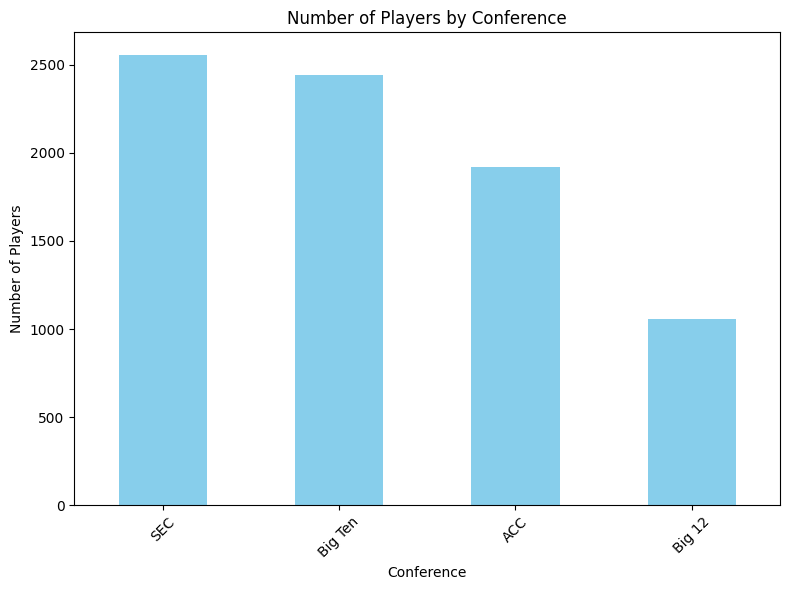

In [24]:
conference_mapping = {
    'Big 12': ['Baylor', 'Brigham Young', 'UCF', 'Cincinnati', 'Houston', 'Iowa State', 'Kansas', 'Kansas State', 'Oklahoma State', 'Texas Christian ', 'Texas Tech', 'West Virginia'],
    'Big Ten': ['Ohio State', 'Illinois', 'Indiana', 'Iowa', 'Maryland', 'Michigan', 'Michigan State', 'Minnesota', 'Nebraska', 'Northwestern', 'Penn State', 'Purdue', 'Rutgers','USC','UCLA','Wisconsin'],
    'ACC': ['Boston College',  'Clemson','Duke', 'Florida State','Georgia Tech', 'Louisville', 'Miami (Fla.)', 'North Carolina', 'North Carolina State',  'Notre Dame', 'Pittsburgh','Syracuse'  'Virginia', 'Virginia Tech', 'Wake Forest'],
    'SEC': ['Alabama', 'Arkansas', 'Auburn', 'Florida', 'Georgia', 'Kentucky', 'LSU', 'Mississippi', 'Mississippi State', 'Missouri', 'South Carolina', 'Tennessee','Oklahoma','Texas A&M','Texas','Vanderbilt'],
}

the_nfl['Conference'] = the_nfl['collegeName'].map({college: conference for conference, colleges in conference_mapping.items() for college in colleges})

conference_counts = the_nfl['Conference'].value_counts()


plt.figure(figsize=(8, 6))
conference_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Players by Conference')
plt.xlabel('Conference')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

In [25]:
for position in unique_positions:
    position_nfl = the_nfl[the_nfl['position'] == position]
    conference_counts = position_nfl['Conference'].value_counts()
    if not conference_counts.empty:
        most_talented_conference = conference_counts.idxmax()
        talent_at_positions[position]['Conference'] = most_talented_conference
        talent_at_positions[position]['Count'] = conference_counts.max()


conf_nfl = pd.DataFrame.from_dict(talent_at_positions, orient='index')


print("Conferences that produce the most talent at each position:")
print(conf_nfl)

Conferences that produce the most talent at each position:
           collegeName  Count Conference
OLB                USC     72        SEC
WR             Florida    312        SEC
DE        Miami (Fla.)    227        SEC
LB          Notre Dame    233    Big Ten
QB          Ohio State     90    Big Ten
DT        Miami (Fla.)    213        SEC
CB        Miami (Fla.)    171        SEC
T                  USC    121    Big Ten
TE            Stanford    170    Big Ten
FB             Alabama     33    Big Ten
G           Notre Dame    123        SEC
RB          Notre Dame    218        SEC
C                  USC     82    Big Ten
FS             Alabama     33    Big Ten
DB       Virginia Tech    219    Big Ten
MLB            Clemson     17        SEC
ILB            Georgia     28        SEC
K              Georgia     44    Big Ten
P            Tennessee     34        SEC
SAF      Arizona State     22        SEC
SS                 LSU     35    Big Ten
LS     San Diego State     18        SE

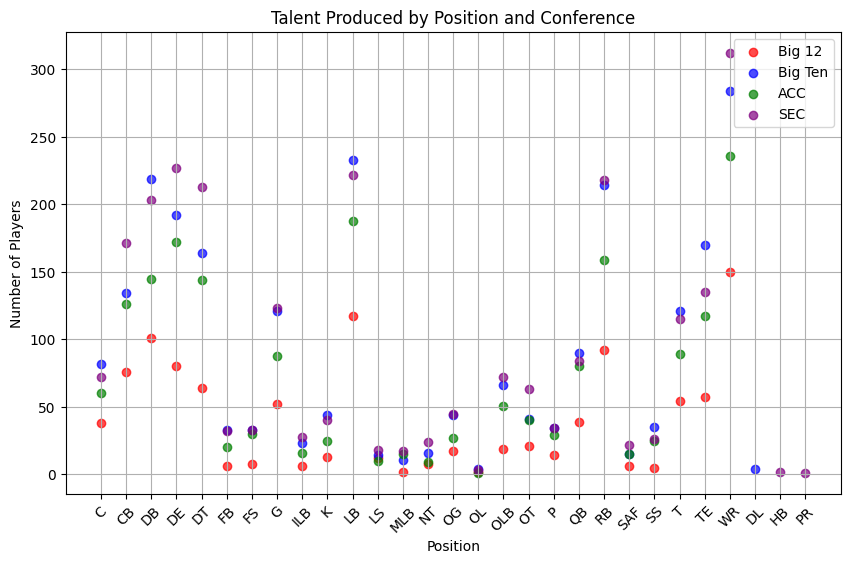

In [26]:
conference_position_counts = the_nfl.groupby(['Conference', 'position']).size().reset_index(name='PlayerCount')

# Create a color map for different conferences
color_map = {
    'Big 12': 'red',
    'Big Ten': 'blue',
    'ACC': 'green',
    'SEC': 'purple',
    # Add more conferences and colors as needed
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

for conference, color in color_map.items():
    conference_data = conference_position_counts[conference_position_counts['Conference'] == conference]
    plt.scatter(conference_data['position'], conference_data['PlayerCount'], label=conference, color=color, alpha=0.7)

plt.title('Talent Produced by Position and Conference')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [27]:
#prepare data for ML
print(the_nfl[['weight', 'Height_Inches', 'position']].isna().sum())
MLdf = the_nfl[['weight', 'Height_Inches', 'position']].dropna()
print(MLdf.isna().sum())
MLdf.head()

weight           7
Height_Inches    7
position         0
dtype: int64
weight           0
Height_Inches    0
position         0
dtype: int64


,weight,Height_Inches,position
0,232.0,74.0,OLB
1,184.0,71.0,WR
2,315.0,77.0,DE
3,250.0,73.0,LB
4,212.0,75.0,QB


In [28]:
X = MLdf[['Height_Inches', 'weight']]  # pred vars
y = MLdf['position']  # response var

In [29]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
#train and test a logistic model to predict which position an NFL player should play based on their height and weight model
#no training linear regression model because the response variable is categorical

logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

#train the model
logmodel.fit(X_train, y_train)

#make predictions 
logpred = logmodel.predict(X_test)

#evaluate accuracy of the model
logaccuracy = logmodel.score(X_test[['Height_Inches', 'weight']], y_test)
print("Accuracy:", logaccuracy)

Accuracy: 0.3959600347523892


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


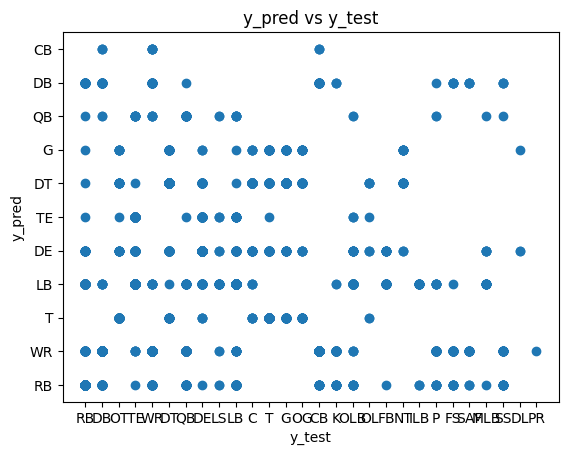

In [31]:
plt.scatter(y_test, logpred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#create a pipeline to scale the data and train the model
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

#train
pipeline.fit(X_train, y_train)

#make pred
pipelogpred = pipeline.predict(X_test[['Height_Inches', 'weight']])

# Evaluate
logaccuracy = pipeline.score(X_test[['Height_Inches', 'weight']], y_test)
print("Accuracy:", logaccuracy)

Accuracy: 0.4200695047784535


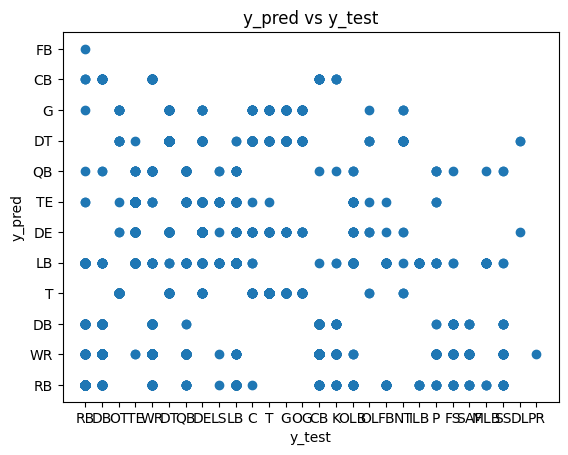

In [33]:
#plot predicted vs actual
plt.scatter(y_test, pipelogpred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test')
plt.show()

In [34]:
#create a new logistic regression model, this time with multi_class set to multinomial
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)

#fit the model
log_reg.fit(X_train, y_train)

#make predictions
y_pred = log_reg.predict(X_test)
logregaccuracy = log_reg.score(X_test[['Height_Inches', 'weight']], y_test)
print("Accuracy:", logregaccuracy)

Accuracy: 0.35425716768027804


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


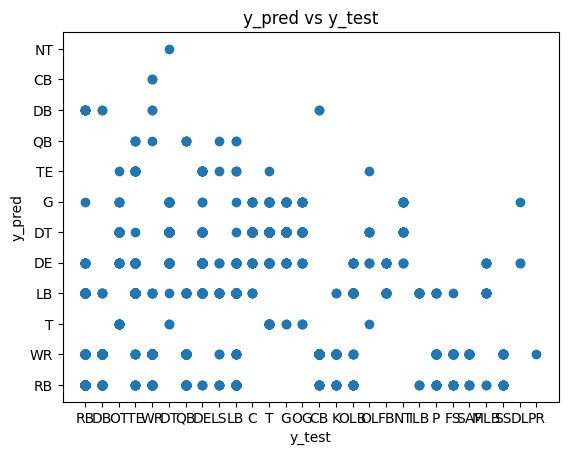

In [35]:
#plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_pred vs y_test')
plt.show()

In [36]:
#train and test a random forest classifier model to predict which position an NFL player should play based on their height and weight model

rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

def predict_position(height, weight):
    return rfc.predict(pd.DataFrame([[height, weight]], columns=['Height_Inches', 'weight']))

#test the model
print(predict_position(70, 180))  # Replace with actual height and weight

#evaluate the model
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

['DB']
Accuracy: 0.3805386620330148


In [37]:
#Computationally expensive 2 to 3min runtime. use gridsearch to find best params

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

#print best parameters
print(grid_search.best_params_)

#use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.4096437880104257


In [38]:
#3min runtime. use gridsearch to find even better params

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [650, 750, 850],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

#best params
print(grid_search.best_params_)

#make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 650}
Accuracy: 0.42593397046046916


In [51]:
from sklearn.tree import DecisionTreeClassifier

# Create a new DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_split=2)
dtc.fit(X_train, y_train)

def predict_positiontree(height, weight):
    return dtc.predict(pd.DataFrame([[height, weight]], columns=['Height_Inches', 'weight']))

#test the model
print(predict_positiontree(70, 180))  # Replace with actual height and weight

height = input('Enter height in inches, press ENTER to continue: ')
weight = input('Enter weight in pounds, press ENTER to continue: ')

height = int(height)
weight = int(weight)

print('Based on a height of', height, 'inches and a weight of', weight, 'lbs,', '\n this player should play at the', 
      predict_positiontree(height, weight), 'poistion.')

#evaluate the model
y_pred = rfc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

['WR']
Based on a height of 74 inches and a weight of 175 lbs, 
 this player should play at the ['WR'] poistion.
Accuracy: 0.3805386620330148


In [40]:
param_grid = {
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 4]
}

grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=2)
#grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=min(5, y_train.nunique()))
grid_search.fit(X_train, y_train)

#output best parameters
print(grid_search.best_params_)

#utilize the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

{'max_depth': 6, 'min_samples_split': 2}
Accuracy: 0.41789748045178104


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


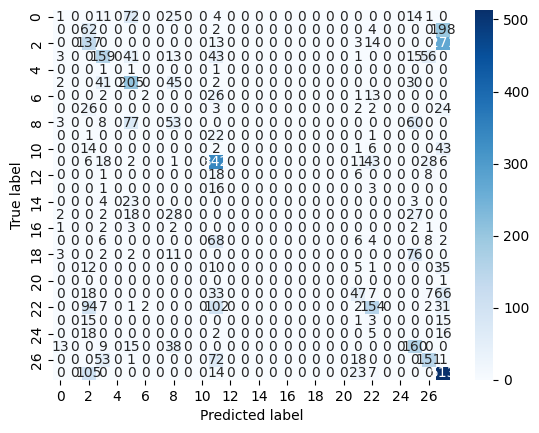

In [41]:
#further assess model performance with confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

#confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

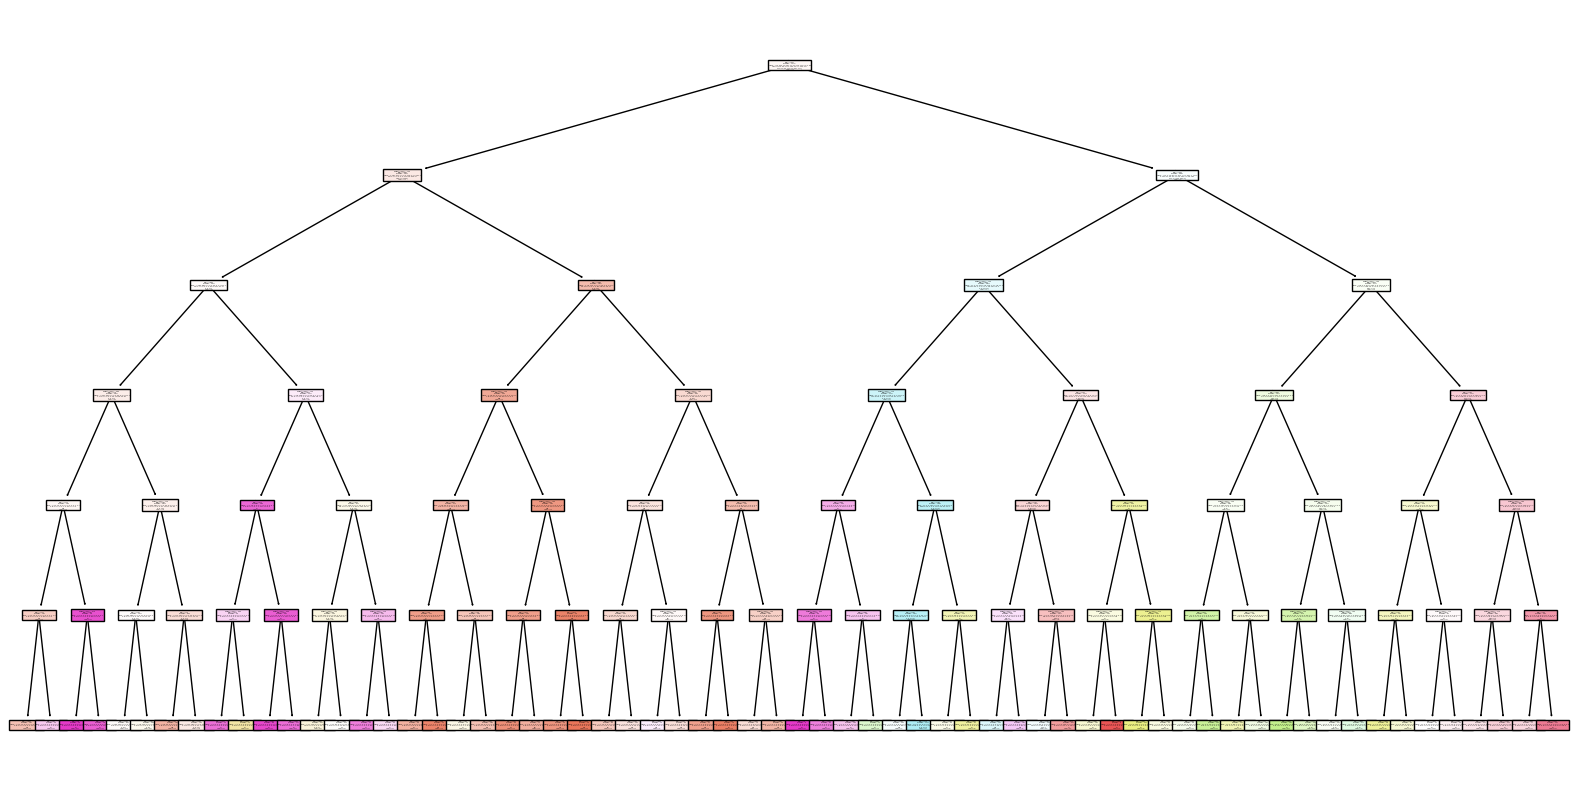

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#arrange plot and set the figure size
#X = the_nfl[['Height_Inches', 'weight']]
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=['OLB', 'WR', 'DE', 'LB', 'QB', 'DT', 'CB',
                                                                         'T', 'TE', 'FB', 'G', 'RB', 'C', 'FS', 'DB',
 'MLB', 'ILB', 'K', 'P', 'SAF', 'SS', 'LS', 'OL', 'NT', 'OT', 'OG', 'KR', 'DL', 'HB',
 'PR'])
plt.show()

In [46]:
unique_classes = y.unique()
print(unique_classes)

['OLB' 'WR' 'DE' 'LB' 'QB' 'DT' 'CB' 'T' 'TE' 'FB' 'G' 'RB' 'C' 'FS' 'DB'
 'MLB' 'ILB' 'K' 'P' 'SAF' 'SS' 'LS' 'OL' 'NT' 'OT' 'OG' 'KR' 'DL' 'HB'
 'PR']
